# EE16A Homework 12 


# Image Compression

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from scipy import ndimage as nd
from scipy import misc
from scipy import io

### Part b

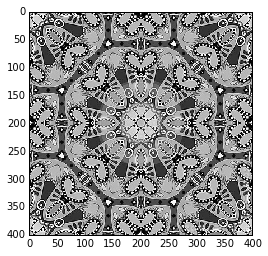

In [3]:
#Load Pattern Image
pattern = np.load('pattern.npy')
plt.imshow(pattern, cmap='gray', interpolation='nearest')

Use the command [shape](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) to find the dimensions of the image. How many eigenvalues do you expect? 

Run the code below to find the eigenvector and eigenvalues of ``pattern`` and sort them in descending order (first eigenvalue/vector corresponds to the largest eigenvalue)

In [4]:
eig_vals, eig_vectors = np.linalg.eig(pattern)
idx = (abs(eig_vals).argsort())
idx = idx[::-1]
eig_vals = eig_vals[idx]
eig_vectors = eig_vectors[:,idx] 

In [5]:
shape(pattern)

(400, 400)

In [6]:
eig_vals

array([  5.17977812e+04,   8.34455214e+03,  -6.53777196e+03,
        -6.13344787e+03,   5.97925389e+03,   5.43521046e+03,
         5.15678719e+03,  -5.06103498e+03,   5.03057925e+03,
         4.95057055e+03,   4.88277007e+03,  -4.78329078e+03,
        -4.66758739e+03,   4.36823143e+03,  -4.35871210e+03,
        -4.21125440e+03,   4.17529754e+03,   3.89197988e+03,
        -3.84604009e+03,   3.76202099e+03,  -3.73568871e+03,
        -3.69561948e+03,  -3.57474874e+03,  -3.47109917e+03,
         3.41343911e+03,  -3.32012404e+03,   3.26277507e+03,
         3.16658861e+03,  -3.13798104e+03,   3.11306440e+03,
        -3.08684516e+03,  -3.01558348e+03,  -2.89849950e+03,
         2.87357964e+03,   2.78387058e+03,   2.68886332e+03,
        -2.66825370e+03,  -2.60403191e+03,  -2.54582880e+03,
        -2.53737232e+03,   2.52743992e+03,   2.47722238e+03,
         2.41780938e+03,   2.38223610e+03,  -2.33203771e+03,
         2.32501131e+03,  -2.29777281e+03,   2.24557245e+03,
        -2.22488247e+03,

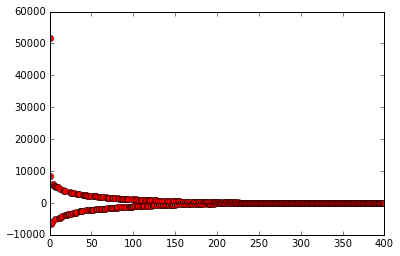

In [7]:
plot(eig_vals, 'ro')

### Part c

Find the pattern approximation using 100 largest eigenvalues/eigenvectors.

* Index into above variables to choose the first 100 eigenvalues and eigenvectors.
* You can use the command [np.outer](http://docs.scipy.org/doc/numpy/reference/generated/numpy.outer.html) to find the outer product of two vectors

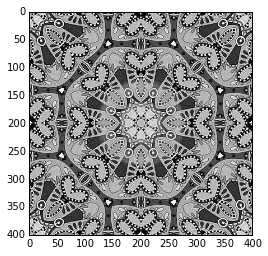

In [9]:
rank = 100
S = np.zeros(pattern.shape)
for i in range(rank):
    vec_i = eig_vectors[:,i]  # i-th largest eigenvector
    val_i = eig_vals[i]       # i-th largest eigenvalue
    S += val_i * np.outer(vec_i, vec_i)
    
plt.imshow(S, cmap='gray', vmin=0, vmax=255)

### Part d
Find the pattern approximation using 50 largest eigenvalues/eigenvectors


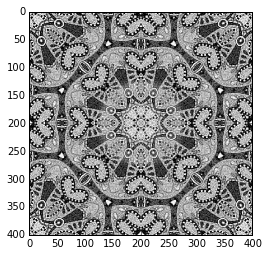

In [10]:
rank = 50
S = np.zeros(pattern.shape)
for i in range(rank):
    vec_i = eig_vectors[:,i]  # i-th largest eigenvector
    val_i = eig_vals[i]       # i-th largest eigenvalue
    S += val_i * np.outer(vec_i, vec_i)
    
plt.imshow(S, cmap='gray', vmin=0, vmax=255)

# Random Surfer

In [11]:
B = np.matrix('0, 1, 0.333333, 0.333333; 0, 0, 0.333333, 0.333333; 0, 0, 0, 0.333333; 1, 0, 0.333333, 0')

In [12]:
np.linalg.eig(B)

(array([ 0.99999950+0.j       , -0.33333325+0.4714044j,
        -0.33333325-0.4714044j, -0.33333300+0.j       ]),
 matrix([[ -6.13571900e-01+0.j        ,  -1.57134969e-01+0.44444431j,
           -1.57134969e-01-0.44444431j,  -1.54518393e-16+0.j        ],
         [ -3.06785873e-01+0.j        ,  -3.14269486e-01-0.11111123j,
           -3.14269486e-01+0.11111123j,  -3.09036785e-16+0.j        ],
         [ -2.30089434e-01+0.j        ,  -2.35702159e-01-0.33333319j,
           -2.35702159e-01+0.33333319j,   7.07106781e-01+0.j        ],
         [ -6.90268646e-01+0.j        ,   7.07107007e-01+0.j        ,
            7.07107007e-01-0.j        ,  -7.07106781e-01+0.j        ]]))

In [13]:
C = np.matrix('0, 1, 0, 0, 0; 1, 0, 0, 0, 0; 0, 0, 0, 0, 1; 0, 0, 0.5, 0, 0; 0, 0, 0.5, 1, 0')

In [14]:
np.linalg.eig(C)

(array([ 1.0+0.j , -1.0+0.j ,  1.0+0.j , -0.5+0.5j, -0.5-0.5j]),
 matrix([[ 0.70710678+0.j        , -0.70710678+0.j        ,
           0.00000000+0.j        ,  0.00000000-0.j        ,  0.00000000+0.j        ],
         [ 0.70710678+0.j        ,  0.70710678+0.j        ,
           0.00000000+0.j        ,  0.00000000-0.j        ,  0.00000000+0.j        ],
         [ 0.00000000+0.j        , -0.00000000+0.j        ,
          -0.66666667+0.j        ,  0.70710678+0.j        ,  0.70710678-0.j        ],
         [ 0.00000000+0.j        , -0.00000000+0.j        ,
          -0.33333333+0.j        , -0.35355339-0.35355339j,
          -0.35355339+0.35355339j],
         [ 0.00000000+0.j        , -0.00000000+0.j        ,
          -0.66666667+0.j        , -0.35355339+0.35355339j,
          -0.35355339-0.35355339j]]))

# Sports Rank

In [15]:
import numpy as np
from scipy import ndimage as nd
from scipy import misc
from scipy import io

In this notebook we will implement the power iteration method to find the dominant eigenvector of a matrix. For the matrix in consideration the dominant eigenvector will correspond to a ranking of the top 25 teams in College football for the 2014 regular season.



First we load the wins of all the teams into a matrix

In [16]:
#Creating W (win) Matrix
W=np.zeros([26,26])


#Alabama
count=0
W[count,[7,15,18,21]]=1
W[count,25]=8.0
Teams={count:'ALA'}
count=count+1

#FSU
Teams.update({count:'FSU'})
W[1,[9,17,19]]=1
W[1,25]=10.0
count=count+1

#Oregon
Teams.update({count:'ORE'})
W[2,[6,11,13,22]]=1
W[2,25]=8.0
count=count+1

#Baylor
Teams.update({count:'BAY'})
W[3,[5,10]]=1
W[3,25]=9.0
count=count+1

#OSU
Teams.update({count:'OSU'})
W[4,[6,16]]=1
W[4,25]=10.0
count=count+1

#TCU
Teams.update({count:'TCU'})
W[5,[10]]=1
W[5,25]=10.0
count=count+1

#MSU
Teams.update({count:'MSU'})
W[6,[24]]=1
W[6,25]=9.0
count=count+1

#MSST
Teams.update({count:'MSST'})
W[7,[18,21]]=1
W[7,25]=8.0
count=count+1

#MISS
Teams.update({count:'MISS'})
W[8,[0,7,20]]=1
W[8,25]=6.0
count=count+1

#GT
Teams.update({count:'GT'})
W[9,[17,12]]=1
W[9,25]=8.0
count=count+1

#KSU
Teams.update({count:'KSU'})
W[count,25]=9.0
count=count+1

#ARIZ
Teams.update({count:'ARIZ'})
W[count,[2,22,14]]=1
W[count,25]=7.0
count=count+1

#UGA
Teams.update({count:'UGA'})
W[count,[17,15,18]]=1
W[count,25]=6.0
count=count+1

#UCLA
Teams.update({count:'UCLA'})
W[count,[14,11,23]]=1
W[count,25]=6.0
count=count+1

#ASU
Teams.update({count:'ASU'})
W[count,[23,22]]=1
W[count,25]=7.0
count=count+1

#MIZZ
Teams.update({count:'MIZZ'})
W[count,25]=10.0
count=count+1

#WISC
Teams.update({count:'WISC'})
W[count,[24]]=1
W[count,25]=9.0
count=count+1

#CLEM
Teams.update({count:'CLEM'})
W[count,[19]]=1
W[count,25]=8.0
count=count+1

#AUB
Teams.update({count:'AUB'})
W[count,[10,8,21]]=1
W[count,25]=5.0
count=count+1

#LOU
Teams.update({count:'LOU'})
W[count,25]=9.0
count=count+1

#BSU
Teams.update({count:'BSU'})
W[count,25]=11.0
count=count+1

#LSU
Teams.update({count:'LSU'})
W[count,[16,8]]=1
W[count,25]=6.0
count=count+1

#UTAH
Teams.update({count:'UTAH'})
W[count,[13,23]]=1
W[count,25]=6.0
count=count+1


#USC
Teams.update({count:'USC'})
W[count,[11]]=1
W[count,25]=7.0
count=count+1

#NEB
Teams.update({count:'NEB'})
W[count,25]=9.0
count=count+1

#OTHERS
Teams.update({count:'Others'})
W[count,[3,4,8,13,14,15,16,18,19,20,21,22,23,24]]=1
W[count,[9,12]]=2


In [17]:
#Creating Q matrix (accounts for normalization by games played)

numrows,numcols=W.shape
Q=np.zeros([numrows,numcols])

for j in range(0,numrows):
    Q[j,:]=W[j,:]/(np.sum(W[:,j])+np.sum(W[j,:])) #sum over column j plus sum over row j is games played by team j


As we discussed earlier the power iteration method can be used to find the dominant eigenvector of a matrix $Q$. If we denote the dominant eigenvector as $\vec{v_D}$ then we showed that for almost any vector $\vec{b}$, $\lim_{n\to\infty}  \frac{Q^n\vec{b}}{|Q^n\vec{b}|}=\frac{c_1\vec{v}_D}{|c\vec{v}_D|}$, where $c$ is a nonzero constant. For numerical reasons, it is better to perform this method iteratively: Take the sequance $\vec{b}_{k+1}=\frac{Q\vec{b_k}}{|Q\vec{b_k}|}$ with $\vec{b}_0=\vec{b}$, in the limit it  converges to $\frac{c_1\vec{v}_D}{|c_1\vec{v}_D|}$, i.e.$\lim_{n\to\infty}\vec{b}_n=\frac{c\vec{v}_D}{||c_1\vec{v}_D||}$. This iterative procedure is precisely the power iteration method.

In the next block you will implement the power iteration method. The b vector has already been intialized for you, all you need to do is update it in the for loop, $\vec{b} \leftarrow \frac{Q\vec{b}}{|Q\vec{b}|}$. The following functions might be useful:
np.dot(A,x) - takes a matrix A and multiplies it by a vector x
and np.linalg.norm(x) - returns the norm of a vector x.
 

In [18]:
#Power Iteration Method

#initializing b
b=np.ones(numrows)

for j in range(0,500):
    b=np.dot(Q,b)/np.linalg.norm(np.dot(Q,b))
    

###Don't forget to do this    
#set v_D equal to your result
    
v_D=b


In [19]:
#Create rankings

v_D=np.absolute(v_D)
indices=np.argsort(v_D)
ratings=np.sort(v_D)
indices=indices[25::-1]

ratings=ratings[25::-1]

#Printing teams (in order) and their score
print('Team','Score')
for j in range(0,26):
    print(Teams[indices[j]], ratings[j])
    

Team Score
ORE 0.315008931845
ALA 0.288273738356
ARIZ 0.2626702629
MISS 0.255733549792
UCLA 0.249273982542
FSU 0.236751105677
AUB 0.221021399589
MSST 0.218963318695
UGA 0.212647337364
BAY 0.199237297226
OSU 0.198224992896
UTAH 0.193453822567
ASU 0.191687923433
LSU 0.1887957695
GT 0.187834421914
TCU 0.167165294131
USC 0.165485303897
MSU 0.153737969203
WISC 0.141911971572
CLEM 0.140310644275
BSU 0.136338991575
MIZZ 0.123944537796
KSU 0.120845924351
LOU 0.120845924351
NEB 0.120845924351
Others 0.0493322169466
